C:\Users\周天越\AppData\Local\Temp\ipykernel_52396\2635848113.py:74: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


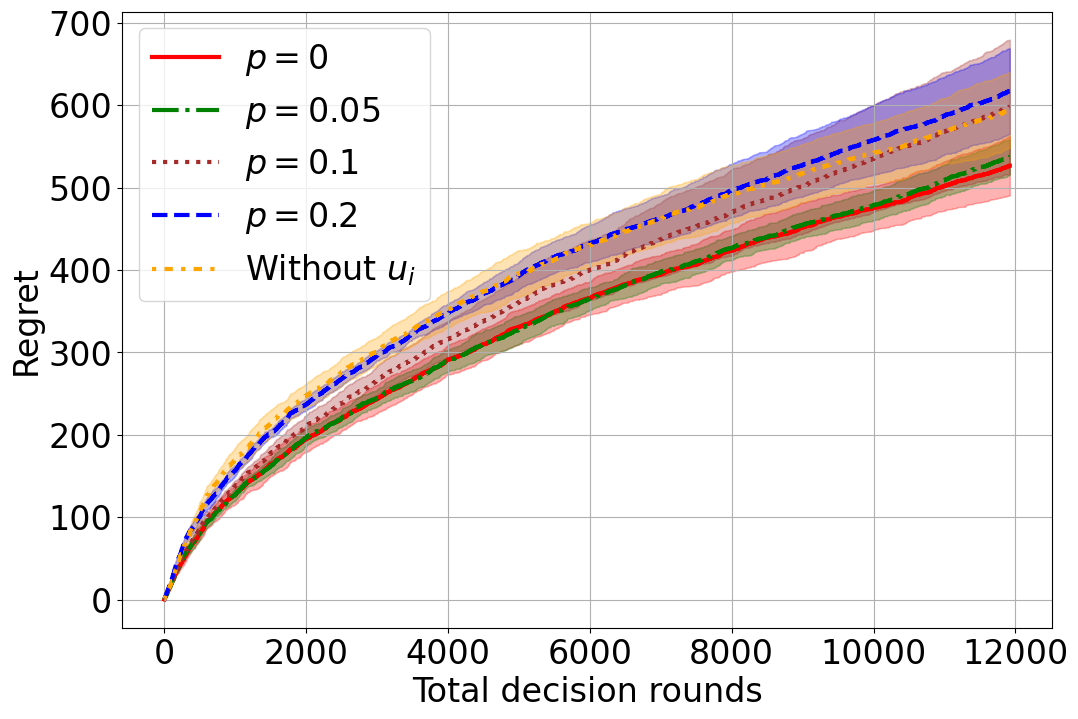

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_algorithm_data(folder, algorithm_name):
    df = pd.read_csv(folder + "result_data.csv")
    df = df.drop(df.columns[0], axis=1)
    df_melted = df.reset_index().melt(id_vars=['index'], var_name='Algorithm', value_name='Regret')
    df_melted.rename(columns={'index': 'Round'}, inplace=True)
    df_melted['Algorithm'] = df_melted['Algorithm'].str.rsplit('_', n=1).str[0]
    df_melted['Test'] = df_melted['Algorithm'].str.rsplit('_', n=1).str[1]
    df_filtered = df_melted[df_melted['Algorithm'] == algorithm_name]
    df_grouped = df_filtered.groupby(['Round'])['Regret'].agg([np.mean, lambda x: np.std(x, ddof=1) * 1.96 / np.sqrt(len(x))])
    df_grouped.columns = ['Mean Regret', '95% CI']
    df_grouped = df_grouped.reset_index()
    return df_grouped

folders = {
    "EWC p=0": "p=0/",
    "EWC p=0.05": "p=0.05/",
    "EWC p=0.1": "p=0.1/",
    "EWC p=0.2": "p=0.2/",
    "No user context": "p=0/",
}

algo_names = {
    "EWC p=0": "EWC",
    "EWC p=0.05": "EWC",
    "EWC p=0.1": "EWC",
    "EWC p=0.2": "EWC",
    "No user context": "EWC_NO_USER_CONTEXT_CLU",
}

colors = {
    "EWC p=0": "red",
    "EWC p=0.05": "green",
    "EWC p=0.1": "brown",
    "EWC p=0.2": "blue",
    "No user context": "orange",
}

line_styles = {
    "EWC p=0": "-",
    "EWC p=0.05": "-.",
    "EWC p=0.1": ":",
    "EWC p=0.2": "--",
    "No user context": (0, (1, 2, 2, 2)),
}

names = {
    "EWC p=0": r"$p=0$",
    "EWC p=0.05": r"$p=0.05$",
    "EWC p=0.1": r"$p=0.1$",
    "EWC p=0.2": r"$p=0.2$",
    "No user context": r'Without $u_i$',
}
plt.figure(figsize=(12, 8))
legend_handles = []

for label, folder in folders.items():
    algo = algo_names[label]
    data = load_algorithm_data(folder, algo)
    plt.plot(data['Round'], data['Mean Regret'], label=names[label], color=colors[label], linestyle=line_styles[label], lw=3.0)
    plt.fill_between(data['Round'], data['Mean Regret'] - data['95% CI'], data['Mean Regret'] + data['95% CI'], color=colors[label], alpha=0.3)
    legend_handle = plt.Line2D([], [], color=colors[label], linestyle=line_styles[label], label=names[label])
    legend_handles.append(legend_handle)

SIZE = 24
plt.xlabel('Total decision rounds', fontsize=SIZE)
plt.ylabel('Regret', fontsize=SIZE)
plt.xticks(fontsize=SIZE)
plt.yticks(fontsize=SIZE)
legend = plt.legend(handles=legend_handles, fontsize=SIZE)
for legobj in legend.legendHandles:
    legobj.set_linewidth(3)
plt.grid(True)
plt.savefig("../../result/noised_user_context.png", format="png")
plt.show()
